https://towardsdatascience.com/shortest-paths-and-dijkstras-algorithm-68c9ec30eff0

In [92]:
from queue import PriorityQueue
import pandas as pd
import heapq as hq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

In [93]:
class Node:
    def __init__(self, value):
        self.value = value
        self.edges = set()

        self.distance = -1
        self.visited = False

    @staticmethod
    def add_edge(a, b, dist):
        a.edges.add((b, dist))

In [94]:
edgesSorted = pd.read_csv('../../data/processed/edgesSorted.txt', names = ['from', 'to', 'distance'])

In [95]:
nodesInHighways = pd.read_csv('../../data/processed/nodesInHighwaysSorted.txt', names = ['ID'])

In [96]:
# 
myNodes = {}

for _, row in nodesInHighways.iterrows():
    ID = row['ID']
    myNodes[ID] = Node(ID)

In [97]:
for i, row in edgesSorted.iterrows():    
    fromID = row['from']
    toID = row['to']
    distance = row['distance']
    
    fromNode = myNodes[fromID]
    toNode =  myNodes[toID]
    
    Node.add_edge(fromNode, toNode, distance)

In [98]:
def calc_distance(start):
    h = []

    start.distance = 0

    hq.heappush(h, (start.distance, start))

    while len(h) > 0:

        cur = hq.heappop(h)

        # check if the nodes has been updated
        if cur[0] != cur[1].distance:
            continue

        for e in cur[1].edges:
            new_distance = cur[1].distance + e[1]

            if e[0].distance < 0 or new_distance < e[0].distance:
                e[0].distance = new_distance
                hq.heappush(h, (new_distance, e[0]))

In [99]:
calc_distance(myNodes[10003583906])

In [100]:
FILEPATH = f'../../data/processed'

coords = []
nodeIDs = []
with open(f'{FILEPATH}/nodesAndPositions.txt', 'r') as nodes:

    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        coords.append(list[1:])
        nodeIDs.append(list[0])


X = np.array(coords)
distances = [myNodes[ID].distance for ID in nodeIDs]

In [101]:
distances

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 21.382882556189184,
 21.249517024842284,
 21.414153360890854,
 20.885080669488662,
 20.981633190068596,
 19.41746591107327,
 19.018064317524924,
 18.447912969277695,
 17.981959787069428,
 17.537795242766798,
 17.09465323568993,
 16.596750794631642,
 17.625278541051934,
 16.70935665283926,
 16.77256935694048,
 16.634255706747787,
 16.353303403893506,
 15.776232196911883,
 12.437052588539034,
 13.371667929280807,
 13.096107468547737,
 13.445709871059384,
 15.069401188416347,
 14.533046859611838,
 14.076781547850057,
 14.911795464513464,
 14.982719329946438,
 15.331715021084017,
 14.66991304097655,
 13.325788968166762,
 13.22841335984693,
 13.071409225893687,
 14.872268268769783,
 15.32223382702437,
 15.608495242829274,
 14.404595703270795,
 13.630871672015022,
 13.023539699391423,
 13.38836716500026,
 12.983342180374216,
 10.06661102510591

In [114]:
distances = np.array(distances)
distances = [1 for distance in distances]

AttributeError: 'PathCollection' object has no property 'markersize'

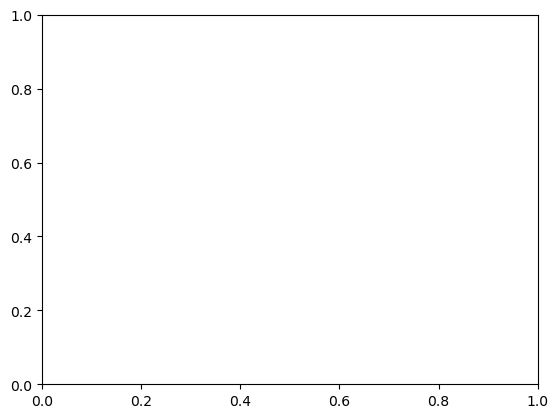

In [118]:
plt.scatter(X[:, 1], X[:, 0], 'o', c =distances, , markersize=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [109]:
len(X)

153298

In [110]:
len(distances)

153298